## A study of Path-Gradient-Planning on the Tic-Tac-Toe Game


In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

from environments.graphworlds.tictactoe import TicTacToe, TicTacToeInteractive
from agents.pgp.pgp_softmax import SoftMaxPGP
from agents.repository import *
from plots.agent_plotter import AgentPlotter
from plots.mdp_visualizer import *
from utils.policy_functions import *
from utils.policy_tools import *

In [27]:
# Training parameters
n_steps = 500
n_iterations = 20
alpha = 0.1

# Other parameters
p_max_medium = 0.9
retrain_all = True

In [28]:
game_simple_X = TicTacToeInteractive(play_first=True, name="tictactoe")
game_simple_O = TicTacToeInteractive(play_first=False, name="tictactoe")

In [29]:

if retrain_all:

    agent_X_expert = SoftMaxPGP(game_simple_X, name="pgp_X_expert", p0_func=p0_uniform)
    agent_O_expert = SoftMaxPGP(game_simple_O, name="pgp_O_expert", p0_func=p0_uniform)

    for i in range(n_iterations):
        print("training iteration #{}...".format(i+1))
        game_hard_X = TicTacToeInteractive(play_first=True, opponent_policy=agent_O_expert.policy_vec(), name="tictactoe")
        game_hard_O = TicTacToeInteractive(play_first=False, opponent_policy=agent_X_expert.policy_vec(), name="tictactoe")
        agent_X_expert.env = game_simple_X
        agent_O_expert.env = game_simple_O
        agent_X_expert.learn(n_steps=n_steps, alpha=alpha, min_theta=None)
        agent_O_expert.learn(n_steps=n_steps, alpha=alpha, min_theta=None) 

    save_model(agent_X_expert)
    save_model(agent_O_expert)

else:
    agent_X_expert = load_model("pgp_X_expert", "tictactoe")
    agent_O_expert = load_model("pgp_O_expert", "tictactoe")



/home/fran-tr/Workspace/gpp_core/utils/policy_functions.py:43: RuntimeWarning: divide by zero encountered in log
  return np.log(agent.A / np.sum(agent.A, axis=1, keepdims=True))


training iteration #1...


100%|██████████| 500/500 [00:05<00:00, 93.37it/s]


training iteration #2...


100%|██████████| 500/500 [00:05<00:00, 95.45it/s]


training iteration #3...


100%|██████████| 500/500 [00:05<00:00, 93.63it/s]


training iteration #4...


100%|██████████| 500/500 [00:05<00:00, 93.97it/s]


training iteration #5...


100%|██████████| 500/500 [00:05<00:00, 92.78it/s]


training iteration #6...


100%|██████████| 500/500 [00:05<00:00, 94.29it/s]


training iteration #7...


100%|██████████| 500/500 [00:05<00:00, 94.57it/s]


training iteration #8...


100%|██████████| 500/500 [00:05<00:00, 93.24it/s]


training iteration #9...


100%|██████████| 500/500 [00:05<00:00, 93.12it/s]


training iteration #10...


100%|██████████| 500/500 [00:05<00:00, 92.93it/s]


training iteration #11...


100%|██████████| 500/500 [00:05<00:00, 94.13it/s]


training iteration #12...


100%|██████████| 500/500 [00:05<00:00, 93.85it/s]


training iteration #13...


100%|██████████| 500/500 [00:05<00:00, 92.79it/s]


training iteration #14...


100%|██████████| 500/500 [00:05<00:00, 93.63it/s]


training iteration #15...


100%|██████████| 500/500 [00:05<00:00, 85.46it/s]


training iteration #16...


100%|██████████| 500/500 [00:05<00:00, 92.48it/s]


training iteration #17...


100%|██████████| 500/500 [00:05<00:00, 95.20it/s]


training iteration #18...


100%|██████████| 500/500 [00:05<00:00, 93.71it/s]


training iteration #19...


100%|██████████| 500/500 [00:05<00:00, 93.84it/s]


training iteration #20...


100%|██████████| 500/500 [00:05<00:00, 93.67it/s]


In [31]:
if retrain_all:

    agent_X_medium = load_model("pgp_X_expert", "tictactoe")
    agent_O_medium = load_model("pgp_O_expert", "tictactoe")
    agent_X_medium.name = "pgp_X_medium"
    agent_O_medium.name = "pgp_O_medium"

    soften_softmax_policy(agent_X_medium, p_max=p_max_medium)
    soften_softmax_policy(agent_O_medium, p_max=p_max_medium)
    save_model(agent_X_medium)
    save_model(agent_O_medium)

else:
    agent_X_medium = load_model("pgp_X_medium", "tictactoe")
    agent_O_medium = load_model("pgp_O_medium", "tictactoe")


In [32]:
game_medium_X = TicTacToeInteractive(play_first=True, opponent_policy=agent_O_medium.policy_vec(), name="X_medium")
game_medium_O = TicTacToeInteractive(play_first=False, opponent_policy=agent_X_medium.policy_vec(), name="O_medium")

game_hard_X = TicTacToeInteractive(play_first=True, opponent_policy=agent_O_expert.policy_vec(), name="X_hard")
game_hard_O = TicTacToeInteractive(play_first=False, opponent_policy=agent_X_expert.policy_vec(), name="O_hard")

In [33]:
games = game_simple_O, game_medium_O, game_hard_O
agent_simple = SoftMaxPGP(games[0], gamma=0.999, p0_func=p0_SR)
SR0 = agent_simple.SR

def p0_SR_simple(agent, s0s=None, p0s=None):
    t0 = p0_onehot(agent, s0s, p0s) @ SR0
    p0 = t0 / np.sum(t0)
    return p0

/home/fran-tr/Workspace/gpp_core/utils/policy_functions.py:43: RuntimeWarning: divide by zero encountered in log
  return np.log(agent.A / np.sum(agent.A, axis=1, keepdims=True))


In [34]:
games = game_simple_O, game_medium_O, game_hard_O
agents = []

for game in games:
    agent = SoftMaxPGP(game, gamma=0.999, p0_func=p0_uniform, name=game.name)
    agent.learn(n_steps=3000, alpha=0.03)
    agents.append(agent)

plotter = AgentPlotter(agents)


100%|██████████| 3000/3000 [00:31<00:00, 93.87it/s]


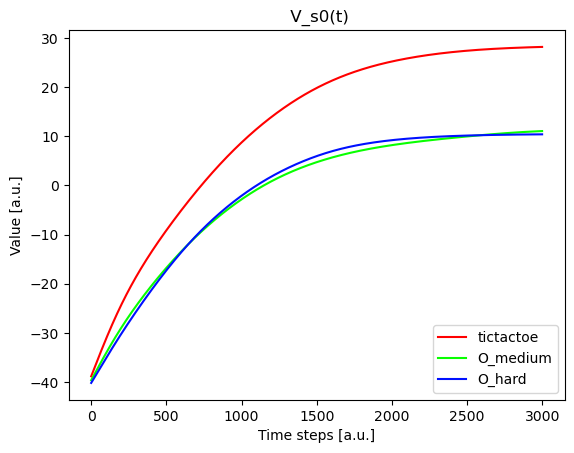

In [35]:
plt.figure()
plotter.plotValue()
plt.show()

In [36]:
states = np.arange(game.n_state)
s_colors = np.array(["black" for _ in states], dtype=object)
s_alphas = np.array([0.05 for _ in states])

state_actions = np.argwhere(game.A)
sa_colors = np.array(["black" for _ in state_actions], dtype=object)
sa_alphas = np.array([0.05 for _ in state_actions])

# TERMINAL STATES

for s in game.states_draw:
    s_colors[s] = "blue"
    s_alphas[s] = 0.3

for s in game.states_lose:
    s_colors[s] = "red"
    s_alphas[s] = 0.3

for s in game.states_win:
    s_colors[s] = "green"
    s_alphas[s] = 0.3

# TRANSIENT STATES
    
# fork state of the opponent: each action is potentially a losing action
for s in game.states_fork_lose:
    s_colors[s] = "orange"
    s_alphas[s] = 0.3

    sa_colors[state_actions[:, 0] == s] = "red"
    sa_alphas[state_actions[:, 0] == s] = 0.3

# state where there is a winning action
for s in game.states_to_win:
    s_colors[s] = "yellowgreen"
    s_alphas[s] = 0.3

# state where there is a fork action
for s, a in game.events_fork_win:

    sa_colors[(state_actions == np.array([s, a])).all(1)] = "yellowgreen"
    sa_alphas[(state_actions == np.array([s, a])).all(1)] = 0.3

# state where there is a losing action
for s, a in game.events_fork_lose:

    sa_colors[(state_actions == np.array([s, a])).all(1)] = "orange"
    sa_alphas[(state_actions == np.array([s, a])).all(1)] = 0.3

plotter.set_states(states, state_colors=s_colors, state_alphas=s_alphas)
plotter.set_state_actions(state_actions, state_action_colors=sa_colors, state_action_alphas=sa_alphas)

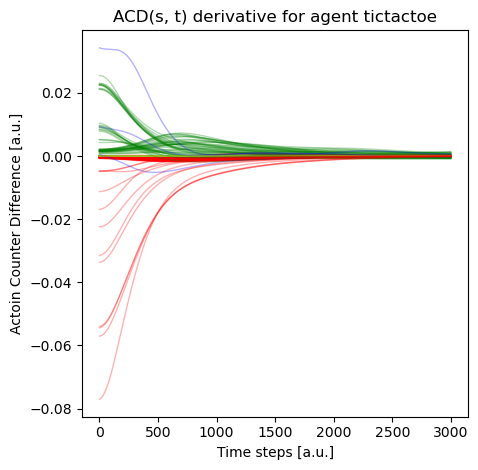

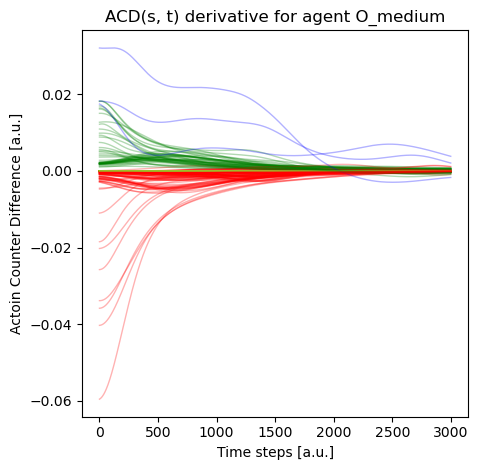

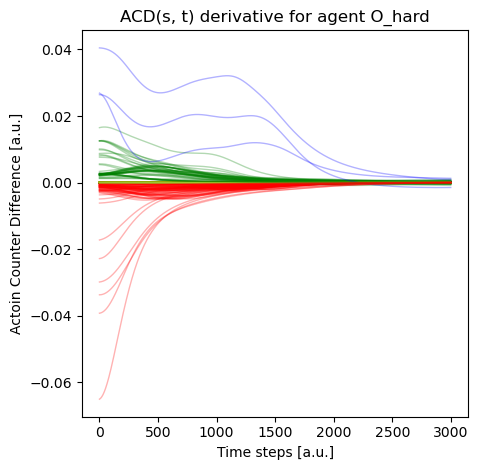

In [37]:
for a in agents:
    plt.figure()
    plotter.plotCounterDifference(agent_id=a, terminal_states=True, transient_states=False, derivative=True, normalize=False, plot_legend=False)
    plt.tight_layout()
    plt.show()

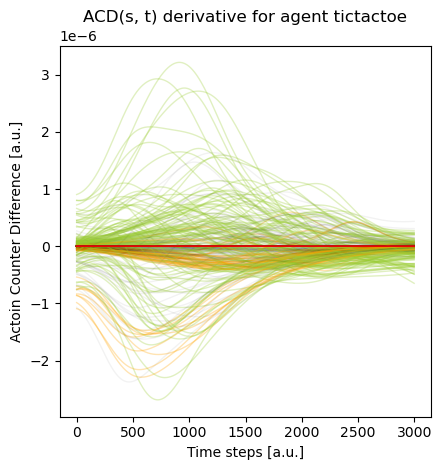

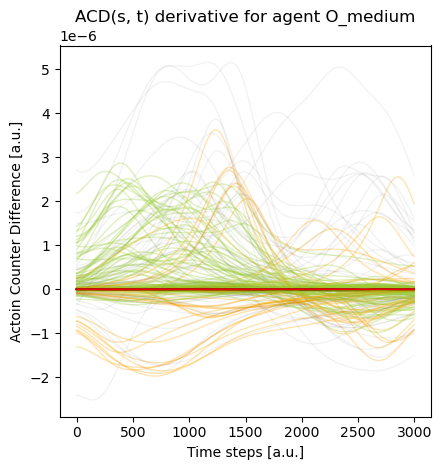

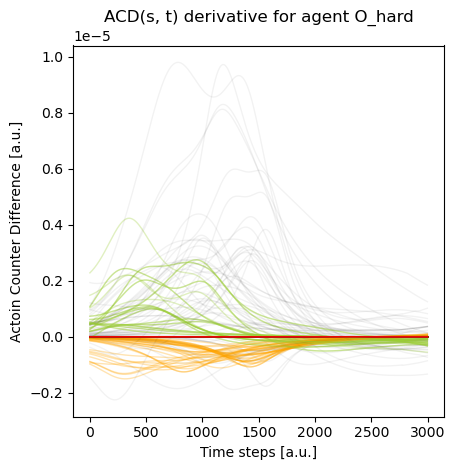

In [38]:
for a in agents:
    plt.figure()
    plotter.plotCounterDifference(agent_id=a, terminal_states=False, transient_states=True, derivative=True, normalize=False, plot_legend=False)
    plt.tight_layout()
    plt.show()

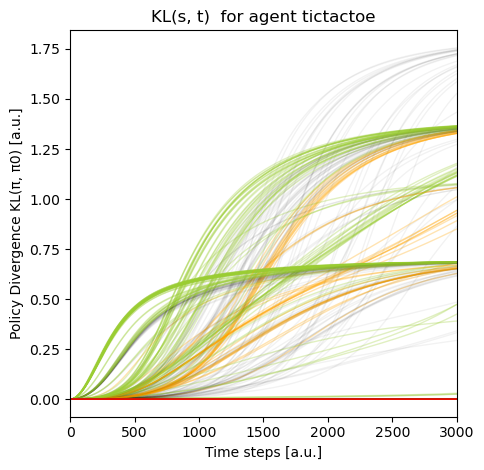

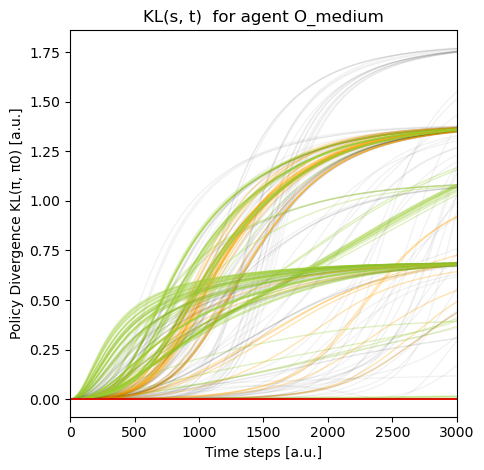

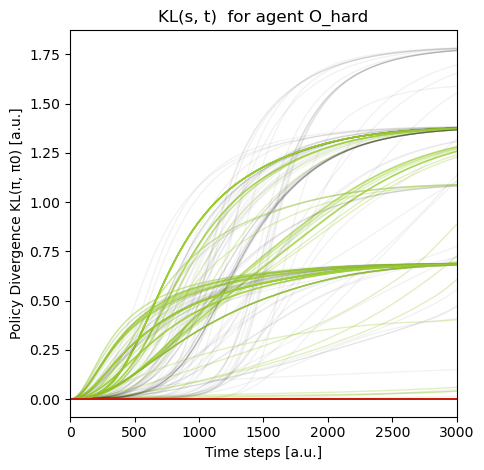

In [39]:
for a in agents:
    plt.figure()
    plotter.plotKLDivergence(agent_id=a, terminal_states=False, transient_states=True, derivative=False, normalize=False, plot_legend=False)
    plt.tight_layout()
    plt.show()

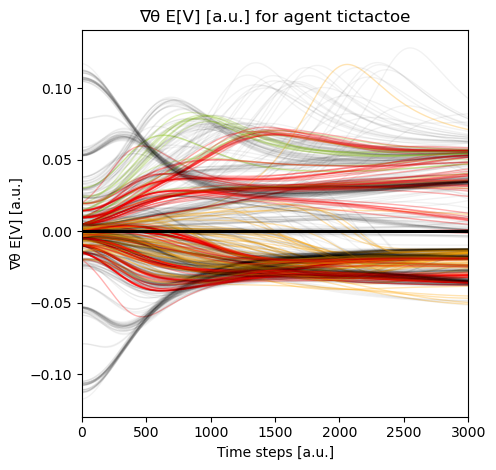

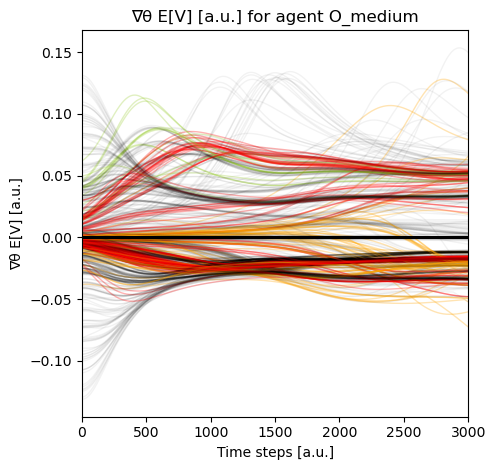

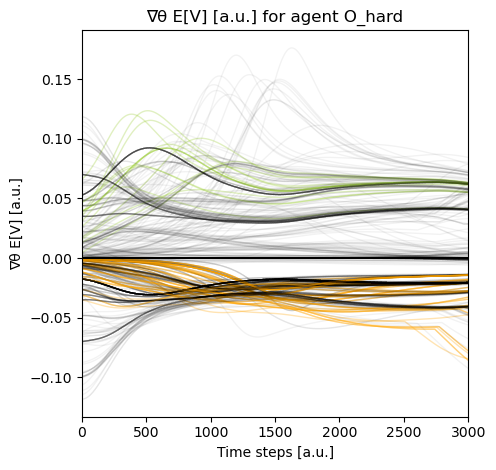

In [40]:
for a in agents:
    plt.figure()
    plotter.plotThetaGradients(agent_id=a, normalize=False, plot_legend=False)
    plt.tight_layout()
    plt.show()

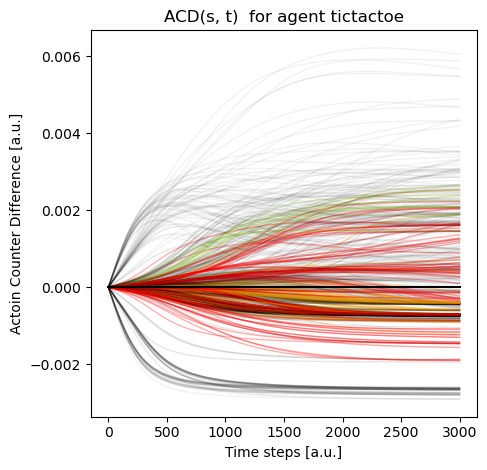

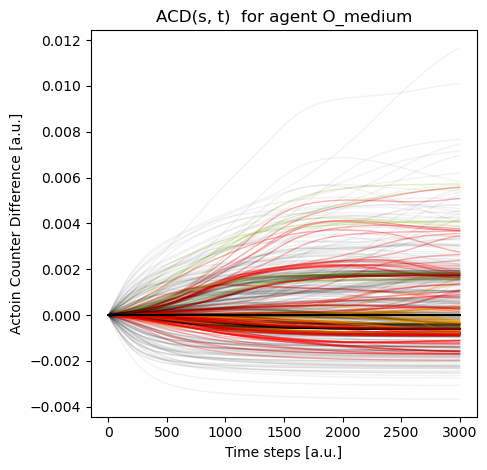

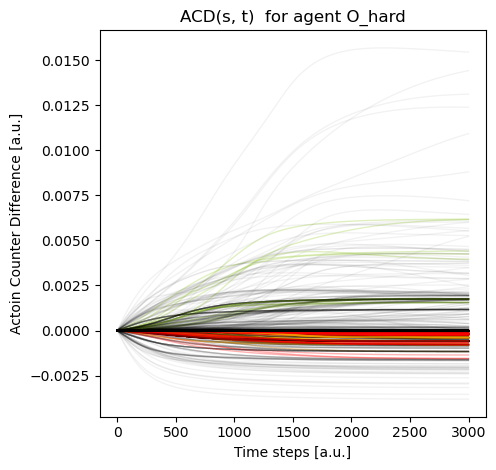

In [41]:
for a in agents:
    plt.figure()
    plotter.plotCounterDifference(agent_id=a, state_actions=True, terminal_states=False, transient_states=True, derivative=False, normalize=False, plot_legend=False)
    plt.tight_layout()
    plt.show()

In [42]:
w = TicTacToe(play_first=True)
a = SoftMaxPGP(w, gamma=0.999, p0_func=p0_uniform)
# a.learn(n_steps=5000)

sas=[w.events_to_win, w.events_fork_win, w.events_to_lose, w.events_fork_lose]
sasc=['green', 'yellowgreen', 'red', 'orange']
ss=[w.states_start, w.states_fork_lose, w.states_lose, w.states_to_win, w.states_win, w.states_draw]
ssc=['blue', 'orange', 'red', 'yellowgreen', 'green', 'black']

plt.figure()
draw_ff_policy(a, state_sets=ss, state_set_colors=ssc, state_action_sets=sas, state_action_set_colors=sasc)


NameError: name 'draw_ff_policy' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
a = agents[2]
d = True
n = False

tt = True
tr = True

# state features
kl = policy_divergence(a, derivative=d, normalize=n, terminal_states=tt, transient_states=tr)
sc = counter_difference(a, derivative=d, normalize=n, terminal_states=tt, transient_states=tr)


# state action features
tg = theta_gradients(a, normalize=n, terminal_states=tt, transient_states=tr)
ac = action_counter_difference(a, derivative=d, normalize=n, terminal_states=tt, transient_states=tr)

In [ ]:
state_features = kl  #np.concatenate([kl, sc])
state_labels = s_colors

action_features = np.concatenate([tg, ac]).reshape([-1, a.n_state * a.n_action])[:, a.A.flatten()]
action_labels = sa_colors

In [ ]:
features = action_features
labels = action_labels

n_components_plot = 10

features = features - np.mean(features)
features = features / np.std(features)

pca = PCA(n_components=n_components_plot)
pca.fit(features.T)

plt.close("all")

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.scatter(np.arange(pca.n_components_), np.cumsum(pca.explained_variance_ratio_))
plt.tight_layout()
plt.title("PCA")
plt.xlabel("# components")
plt.ylabel("variance explained")
plt.show()

In [ ]:
%matplotlib qt
n_components = 3

pca = PCA(n_components=n_components)
pca.fit(features.T)
featurex_projection = pca.transform(features.T)

fig =plt.figure()
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.scatter(featurex_projection[:, 0], featurex_projection[:, 1], featurex_projection[:, 2], c=labels, s=100, cmap=plt.cm.nipy_spectral, alpha=0.5, edgecolor="None")

ax.set_xlabel('$X$', fontsize=20, rotation=150)
ax.set_ylabel('$Y$')
ax.set_zlabel(r'$\gamma$', fontsize=30, rotation=60)

/tmp/ipykernel_4599/2599437629.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(featurex_projection[:, 0], featurex_projection[:, 1], featurex_projection[:, 2], c=labels, s=100, cmap=plt.cm.nipy_spectral, alpha=0.5, edgecolor="None")


Text(0.5, 0, '$\\gamma$')

In [ ]:
labels.shape

(2217,)